## Analyse the spinup results

In [98]:
import xarray as xr
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt

path_fig = '/Users/iriskeizer/Documents/ROMS/figures/analysis/spinup analysis/'

## Import and process data

In [99]:
spinup1 = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ROMS output/spinup1/NorthSea4_avg.nc')
spinup2 = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ROMS output/spinup2/NorthSea4_avg.nc')
spinup3 = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ROMS output/spinup3/NorthSea4_avg.nc')
run2 = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ROMS output/run2/newer/NorthSea4_avg.nc')
run3 = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ROMS output/run3/NorthSea4_avg_annual.nc')
run4 = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ROMS output/run4/NorthSea4_avg_annual.nc')
ora20c = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ORA20C/forcing input/ora20c.nc')

In [100]:
# Sort coordinates in increasing order
run2 = run2.sortby(['ocean_time'])
run3 = run3.sortby(['ocean_time'])
run4 = run4.sortby(['ocean_time'])

# Remove years before 1950
run2 = run2.where(run2.ocean_time.dt.year > 1949, drop = True)

# Remove incomplete years
run2 = run2.where(run2.ocean_time.dt.year < 1994, drop = True)
run3 = run3.where(run3.ocean_time.dt.year < 2008, drop = True)
run4 = run4.where(run4.ocean_time.dt.year < 1982, drop = True)

# Obtain monthly and yearly averages
run2_mon = run2.resample(ocean_time='1M').mean()
run2_year = run2.resample(ocean_time='1Y').mean()

run3_year = run3
run4_year = run4

In [101]:
# Sort coordinates in increasing order
ora20c = ora20c.sortby(['time', 'depth', 'latitude', 'longitude'])


# Remove years before 1950
ora20c = ora20c.where(ora20c.time.dt.year > 1949, drop = True)


# Obtain monthly and yearly averages
ora20_mon = ora20c.resample(time='1M').mean()
ora20_year = ora20c.resample(time='1Y').mean()



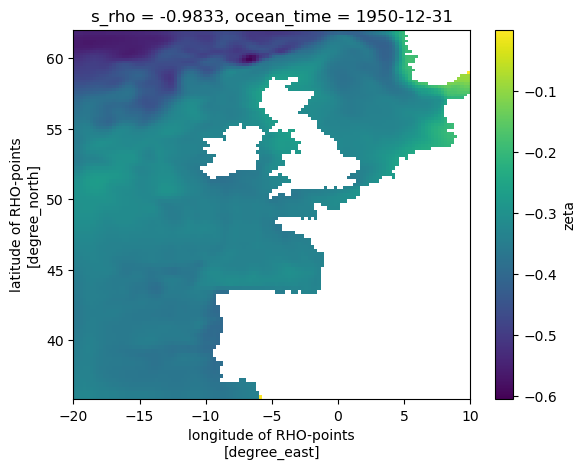

In [102]:
run2_year.isel(ocean_time=0, s_rho=0).zeta.plot(x='lon_rho', y='lat_rho')

In [103]:
# Sort coordinates in increasing order
ora20c = ora20c.sortby(['time', 'depth', 'latitude', 'longitude'])

# Remove years before 1950
ora20c = ora20c.where(ora20c.time.dt.year > 1949, drop = True)

# Only use ROMS domain
ora20c = ora20c.where((ora20c.latitude > 36) & (ora20c.latitude < 62) & (ora20c.longitude > -20 ) & (ora20c.longitude < 10) , drop = True) # Select region


# Obtain monthly and yearly averages
ora20_mon = ora20c.resample(time='1M').mean()
ora20_year = ora20c.resample(time='1Y').mean()




In [104]:
# Remove incomplete years
spinup1 = spinup1.where(spinup1.ocean_time.dt.year < 1960, drop = True)
spinup2 = spinup2.where(spinup2.ocean_time.dt.year < 1960, drop = True)
spinup3 = spinup3.where(spinup3.ocean_time.dt.year < 1960, drop = True)



# Obtain monthly and yearly averages
spinup1_mon = spinup1.resample(ocean_time='1M').mean()
spinup2_mon = spinup2.resample(ocean_time='1M').mean()
spinup3_mon = spinup3.resample(ocean_time='1M').mean()

spinup1_year = spinup1.resample(ocean_time='1Y').mean()
spinup2_year = spinup2.resample(ocean_time='1Y').mean()
spinup3_year = spinup3.resample(ocean_time='1Y').mean()

## Import tide gauge stations coordinates

In [105]:
def station_coords(): 
    """
    Function to obtain the coordinates of the tide gauge stations as a dataframe
    
    """
    path_slh = '/Users/iriskeizer/Documents/ROMS/data/'
    stations = ['Vlissingen', 'Hoek v. Holland', 'Den Helder', 'Delfzijl', 'Harlingen', 'IJmuiden', 'Brest', 'Sheerness', 'Cuxhaven']
    
    # Necessary declarations to obtain tide gauge station coordinates
    path_locations = path_slh + 'rlr_annual/filelist.txt'
    loc_num = [20, 22, 23, 24, 25, 32, 1, 3, 7]
    col_names = ['id', 'lat', 'lon', 'station', 'coastline_code', 'station_code', 'quality']
    
    # Create dataframe
    df = pd.read_csv(path_locations, sep=';', header=None, names=col_names)
    df = df.set_index('id')
    df = df.loc[loc_num, :]
    df['station'] = stations
    df = df.set_index('station')
    df = df.drop(['coastline_code', 'station_code', 'quality'], axis=1)
    
    return df

tg_coords = station_coords()

In [106]:
tg_coords

,lat,lon
station,,
Vlissingen,51.442222,3.596111
Hoek v. Holland,51.977500,4.120000
Den Helder,52.964444,4.745000
Delfzijl,53.326389,6.933056
Harlingen,53.175556,5.409444
IJmuiden,52.462222,4.554722
Brest,48.382850,-4.494838
Sheerness,51.445639,0.743444
Cuxhaven,53.866667,8.716667


In [107]:
# Create dataframe containing eta_rho and xi_rho tide gauge coordinates

tg_roms_coords = tg_coords.copy()

tg_roms_coords['lat'] = [58, 58, 65, 67, 66, 62, 44, 58, 69]
tg_roms_coords['lon'] = [94, 98, 100, 109, 103, 99, 63, 84, 116]

tg_roms_coords.columns = ['eta_rho', 'xi_rho']

## Compare yearly sea level 

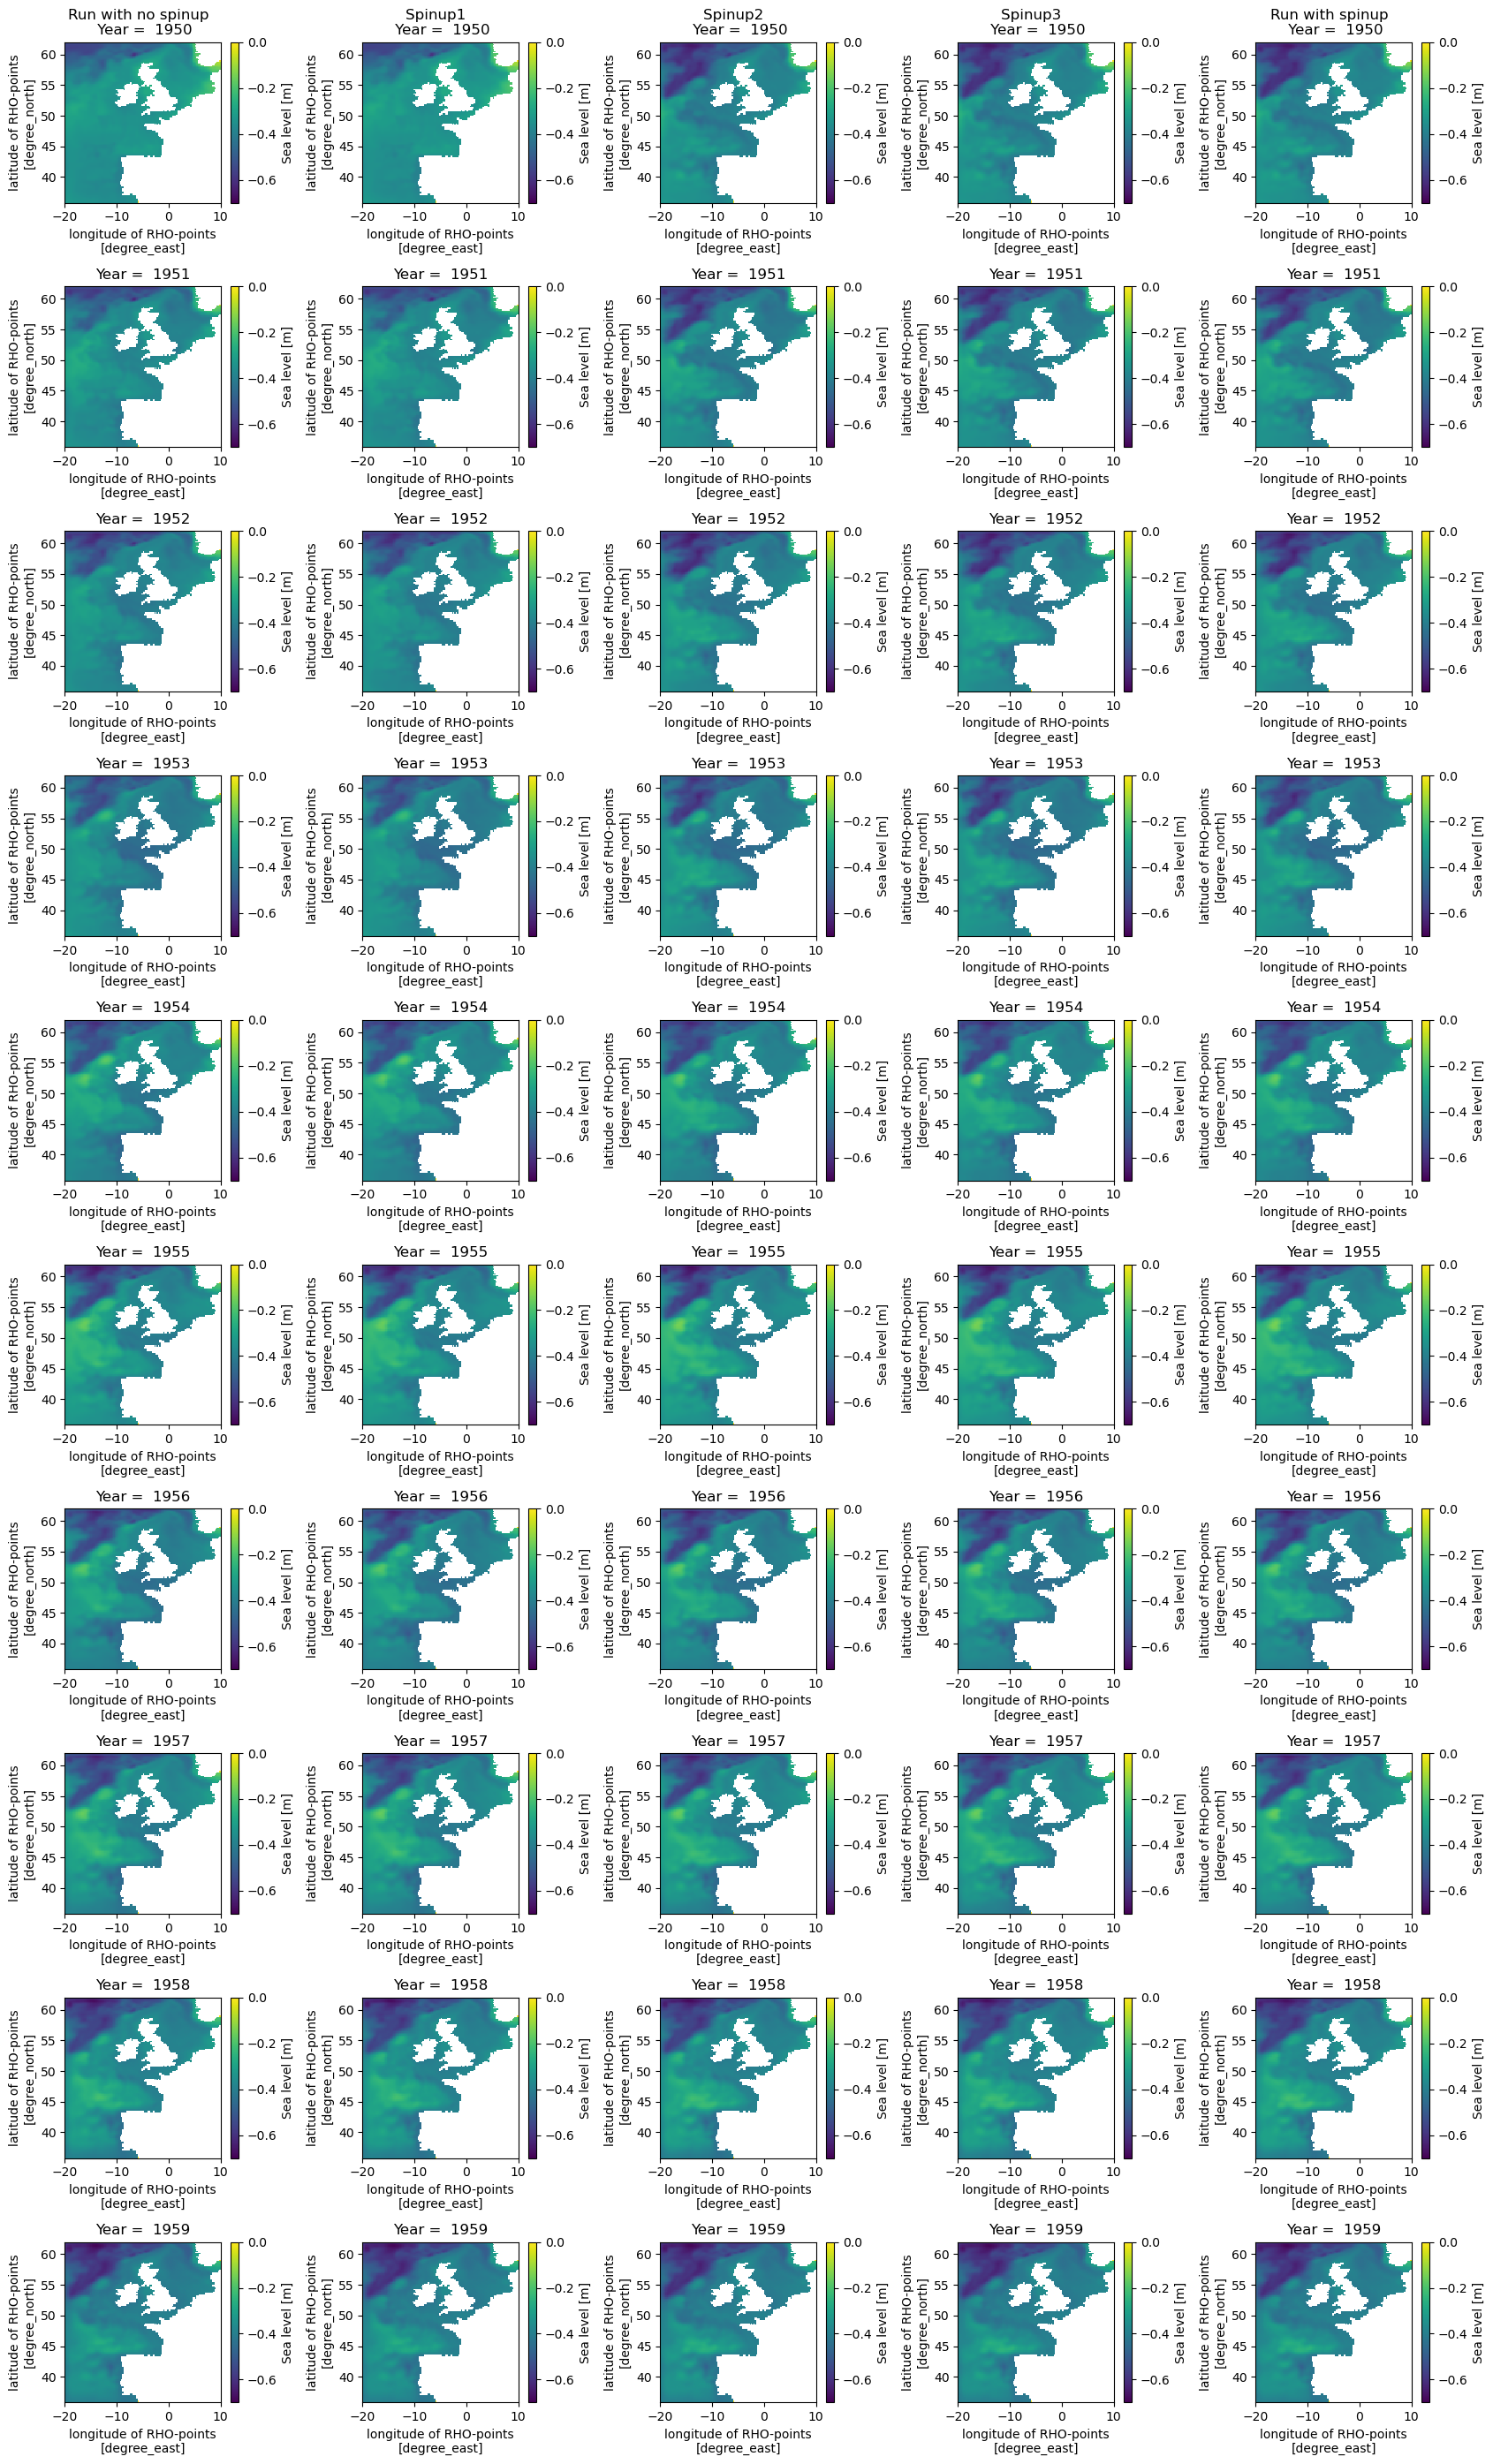

In [108]:
nrows=10

fig, axes = plt.subplots(ncols = 5, nrows = nrows, figsize = (17, 2.8*nrows))

for i in range(nrows):
    
    # Plot sea level maps
    
    run2_year.zeta.isel(ocean_time = i).plot(ax = axes[i, 0], vmin = -0.7, vmax = 0, y='lat_rho', x='lon_rho', cbar_kwargs={"label": "Sea level [m]"})
    
    if i == 0:
        axes[i, 0].set_title(f'Run with no spinup  \n Year =  {run2_year.ocean_time.isel(ocean_time=i).dt.year}')
    
    else:
        axes[i, 0].set_title(f'Year =  {run2_year.ocean_time.isel(ocean_time=i).dt.year}')
    
    
    
    spinup1_year.zeta.isel(ocean_time = i).plot(ax = axes[i, 1], vmin = -0.7, vmax = 0, y='lat_rho', x='lon_rho', cbar_kwargs={"label": "Sea level [m]"})
   
    if i == 0:
        axes[i, 1].set_title(f'Spinup1  \n Year =  {spinup1_year.ocean_time.isel(ocean_time=i).dt.year}')
    
    else:
        axes[i, 1].set_title(f'Year =  {spinup1_year.ocean_time.isel(ocean_time=i).dt.year}')
    
    
    
    spinup2_year.zeta.isel(ocean_time = i).plot(ax = axes[i, 2], vmin = -0.7, vmax = 0, y='lat_rho', x='lon_rho', cbar_kwargs={"label": "Sea level [m]"})
   
    if i == 0:
        axes[i, 2].set_title(f'Spinup2  \n Year =  {spinup2_year.ocean_time.isel(ocean_time=i).dt.year}')
    
    else:
        axes[i, 2].set_title(f'Year =  {spinup2_year.ocean_time.isel(ocean_time=i).dt.year}')
    
    
    spinup3_year.zeta.isel(ocean_time = i).plot(ax = axes[i, 3], vmin = -0.7, vmax = 0, y='lat_rho', x='lon_rho', cbar_kwargs={"label": "Sea level [m]"})
   
    if i == 0:
        axes[i, 3].set_title(f'Spinup3  \n Year =  {spinup3_year.ocean_time.isel(ocean_time=i).dt.year}')
    
    else:
        axes[i, 3].set_title(f'Year =  {spinup3_year.ocean_time.isel(ocean_time=i).dt.year}')
    
    
    run3_year.zeta.isel(ocean_time = i).plot(ax = axes[i, 4], vmin = -0.7, vmax = 0, y='lat_rho', x='lon_rho', cbar_kwargs={"label": "Sea level [m]"})
    
    if i == 0:
        axes[i, 4].set_title(f'Run with spinup  \n Year =  {run3_year.ocean_time.isel(ocean_time=i).dt.year}')
    
    else:
        axes[i, 4].set_title(f'Year =  {run3_year.ocean_time.isel(ocean_time=i).dt.year}')
    
    
plt.tight_layout()

plt.savefig(f'{path_fig}maps_NWES')

## Compare sea level at tide gauge locations

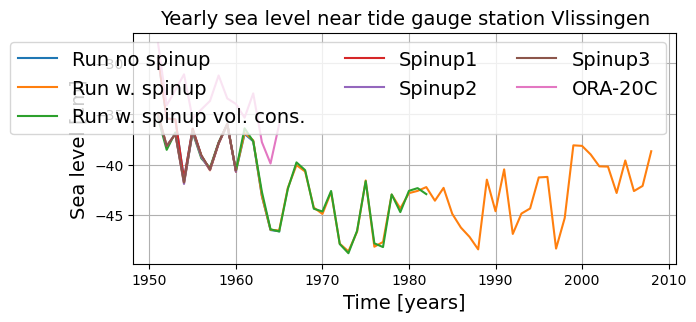

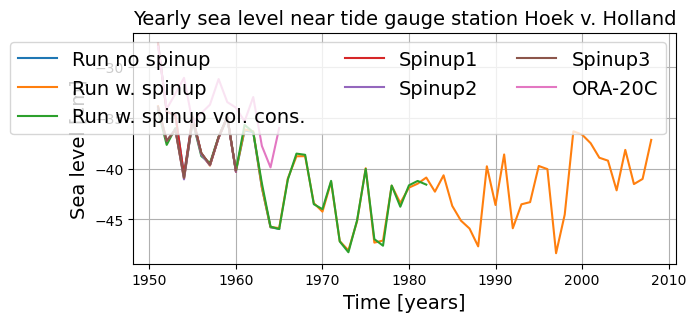

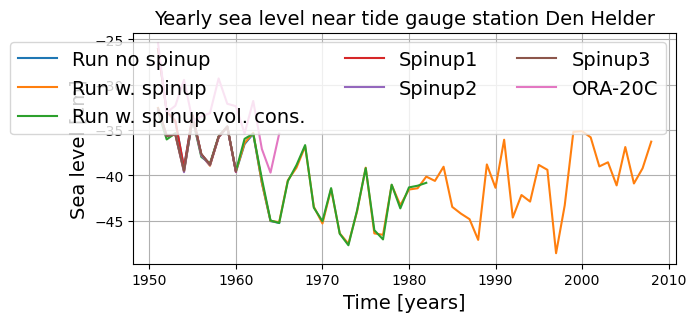

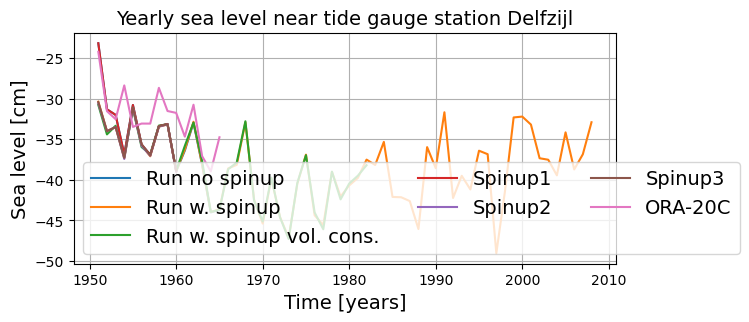

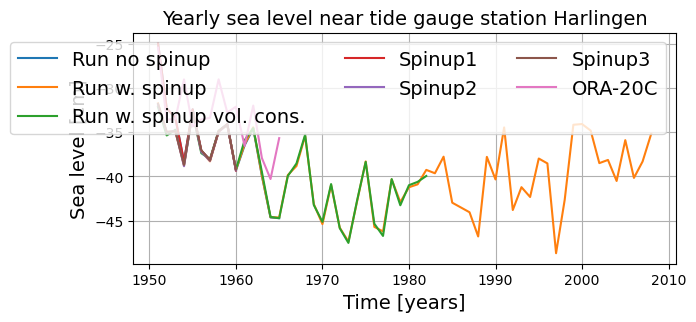

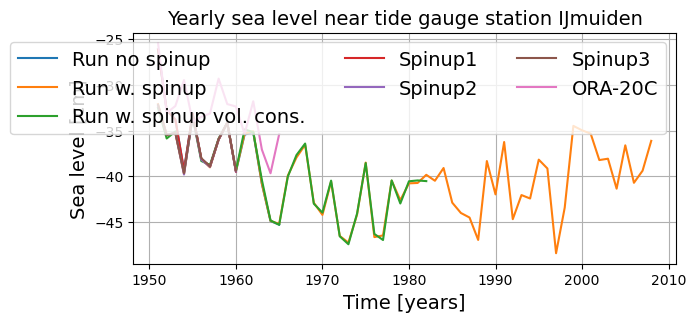

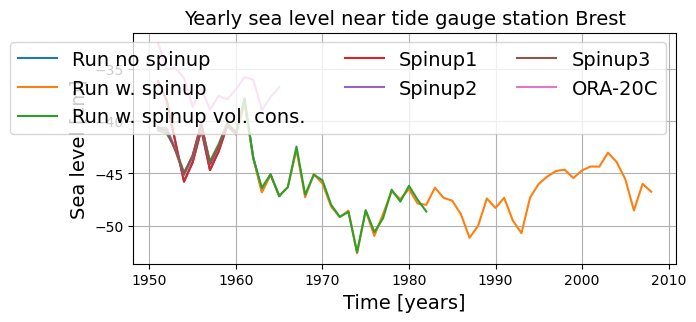

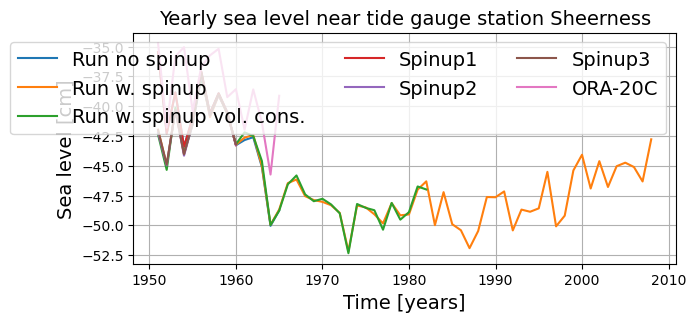

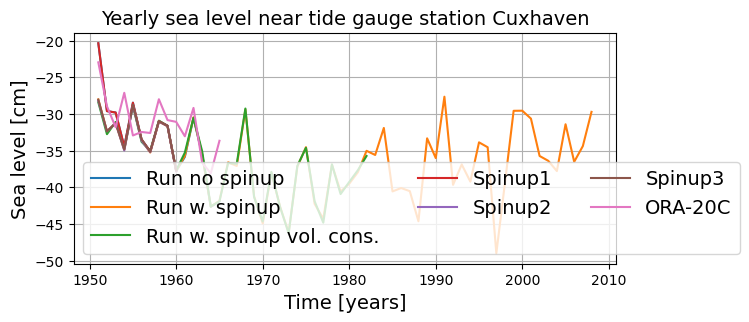

In [109]:
stations = ['Vlissingen', 'Hoek v. Holland', 'Den Helder', 'Delfzijl', 'Harlingen', 'IJmuiden', 'Brest', 'Sheerness', 'Cuxhaven']

for station in stations:

    plt.figure(figsize = (7,3))

    

    # Select data near station    
    run2_station = run2_year.sel(eta_rho = tg_roms_coords['eta_rho'][station], xi_rho = tg_roms_coords['xi_rho'][station])
    run3_station = run3_year.sel(eta_rho = tg_roms_coords['eta_rho'][station], xi_rho = tg_roms_coords['xi_rho'][station])
    run4_station = run4_year.sel(eta_rho = tg_roms_coords['eta_rho'][station], xi_rho = tg_roms_coords['xi_rho'][station])
    spinup1_station = spinup1_year.sel(eta_rho = tg_roms_coords['eta_rho'][station], xi_rho = tg_roms_coords['xi_rho'][station])
    spinup2_station = spinup2_year.sel(eta_rho = tg_roms_coords['eta_rho'][station], xi_rho = tg_roms_coords['xi_rho'][station])
    spinup3_station = spinup3_year.sel(eta_rho = tg_roms_coords['eta_rho'][station], xi_rho = tg_roms_coords['xi_rho'][station])
    
    if station == 'Hoek v. Holland':
        
        ora_station = ora20_year.sel(latitude = tg_coords['lat'][station], longitude = tg_coords['lon'][station]-0.2, method = 'Nearest')
        
    
    elif station == 'Cuxhaven': 
        
        ora_station = ora20_year.sel(latitude = tg_coords['lat'][station]+0.5, longitude = tg_coords['lon'][station], method = 'Nearest')
        
    else:
         
        ora_station = ora20_year.sel(latitude = tg_coords['lat'][station], longitude = tg_coords['lon'][station], method = 'Nearest')

    
    # Make data shorter period
    run2_station = run2_station.where((run2_station.ocean_time.dt.year < 1965), drop = True)
    ora_station = ora_station.where((ora_station.time.dt.year < 1965), drop = True)

    # Plot data
    plt.plot(run2_station.ocean_time, run2_station.zeta*100)
    plt.plot(run3_station.ocean_time, run3_station.zeta*100)
    plt.plot(run4_station.ocean_time, run4_station.zeta*100)
    plt.plot(spinup1_station.ocean_time, spinup1_station.zeta*100)
    plt.plot(spinup2_station.ocean_time, spinup2_station.zeta*100)
    plt.plot(spinup3_station.ocean_time, spinup3_station.zeta*100)
    plt.plot(ora_station.time, ora_station.zos*100)


    # Format figure
    fsize = 14

    plt.xlabel('Time [years]', fontsize = fsize)
    plt.ylabel('Sea level [cm]', fontsize = fsize)
    plt.title(f'Yearly sea level near tide gauge station {station}', fontsize = fsize)

    #plt.xlim([1950, 2020])
    #plt.xticks([1960, 1980, 2000, 2020], fontsize = fsize)
    #plt.yticks([-40, -20], fontsize = fsize)

    plt.grid()


    # Add legend
    plt.legend(labels = ['Run no spinup', 'Run w. spinup', 'Run w. spinup vol. cons.', 'Spinup1', 'Spinup2', 'Spinup3', 'ORA-20C'], fontsize = fsize, ncol=3)
    
    '''
    if station == 'Hoek v. Holland':
        plt.savefig(f'figures/ora_roms_tidegauges_HoekvHolland')
    else:
        plt.savefig(f'figures/ora_roms_tidegauges_{station}')
    '''

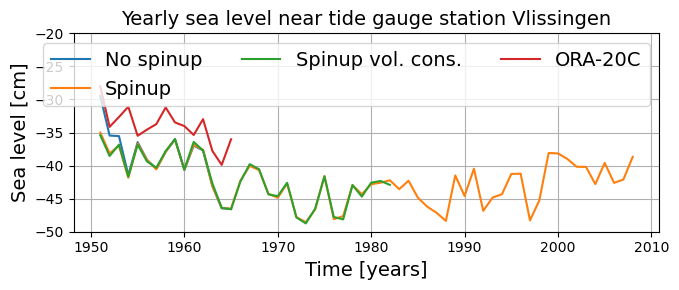

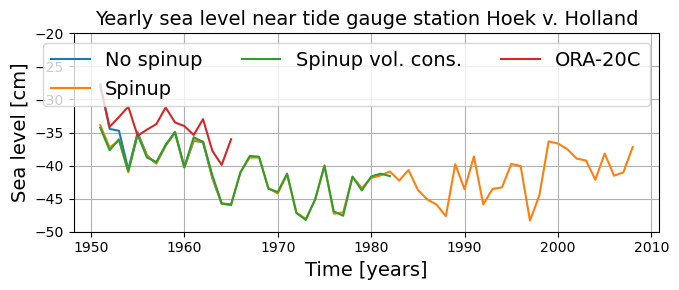

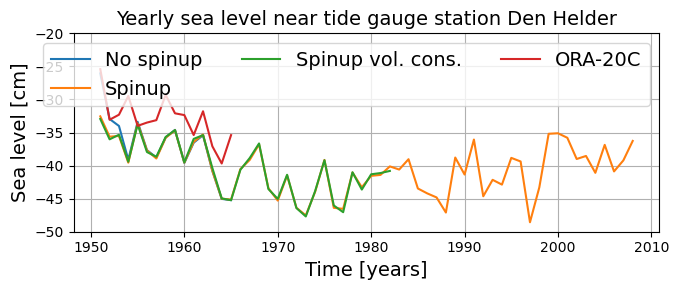

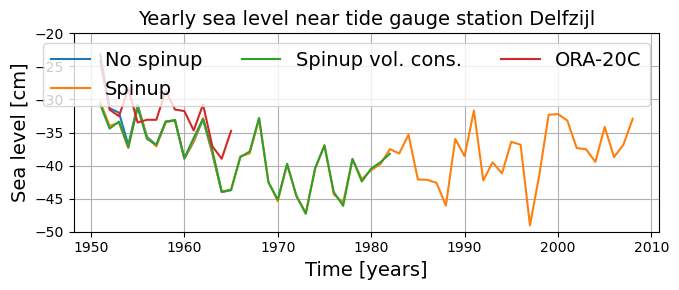

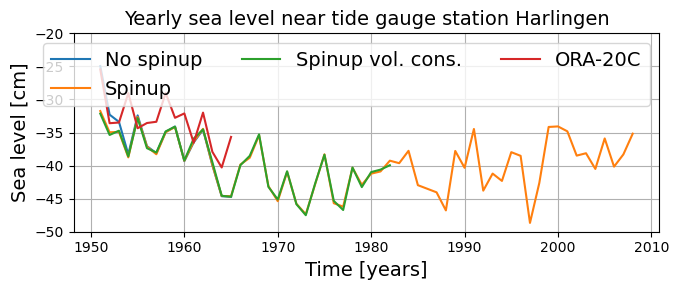

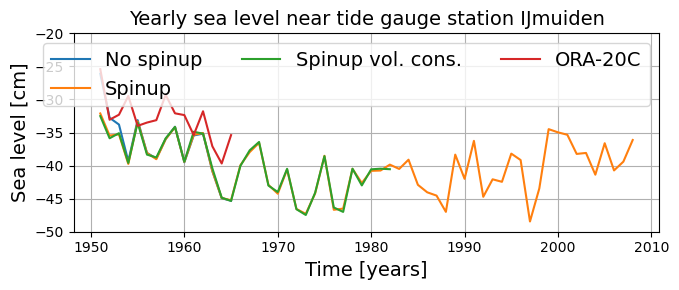

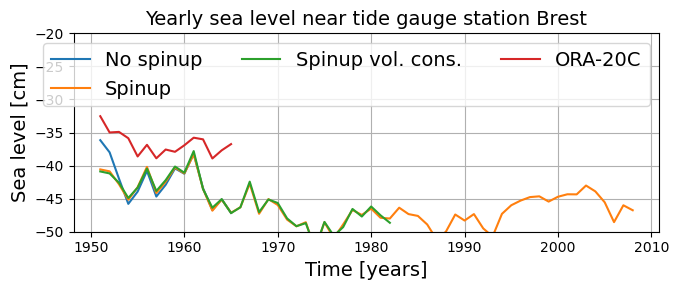

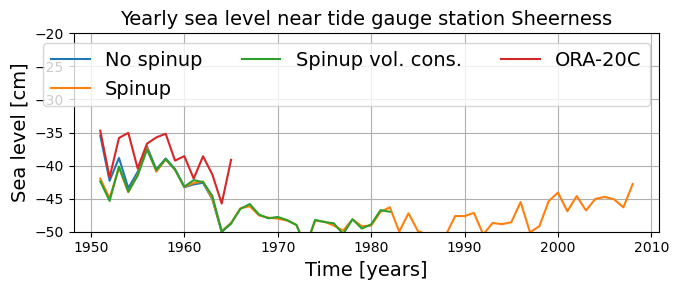

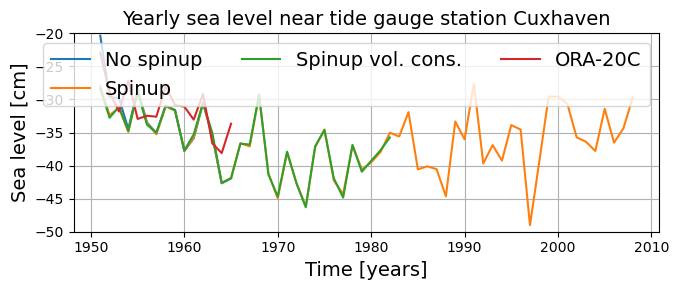

In [110]:
stations = ['Vlissingen', 'Hoek v. Holland', 'Den Helder', 'Delfzijl', 'Harlingen', 'IJmuiden', 'Brest', 'Sheerness', 'Cuxhaven']

for station in stations:

    plt.figure(figsize = (7,3))

    

    # Select data near station    
    run2_station = run2_year.sel(eta_rho = tg_roms_coords['eta_rho'][station], xi_rho = tg_roms_coords['xi_rho'][station])
    run3_station = run3_year.sel(eta_rho = tg_roms_coords['eta_rho'][station], xi_rho = tg_roms_coords['xi_rho'][station])
    run4_station = run4_year.sel(eta_rho = tg_roms_coords['eta_rho'][station], xi_rho = tg_roms_coords['xi_rho'][station])
    spinup1_station = spinup1_year.sel(eta_rho = tg_roms_coords['eta_rho'][station], xi_rho = tg_roms_coords['xi_rho'][station])
    spinup2_station = spinup2_year.sel(eta_rho = tg_roms_coords['eta_rho'][station], xi_rho = tg_roms_coords['xi_rho'][station])
    spinup3_station = spinup3_year.sel(eta_rho = tg_roms_coords['eta_rho'][station], xi_rho = tg_roms_coords['xi_rho'][station])
    
    if station == 'Hoek v. Holland':
        
        ora_station = ora20_year.sel(latitude = tg_coords['lat'][station], longitude = tg_coords['lon'][station]-0.2, method = 'Nearest')
        
    
    elif station == 'Cuxhaven': 
        
        ora_station = ora20_year.sel(latitude = tg_coords['lat'][station]+0.5, longitude = tg_coords['lon'][station], method = 'Nearest')
        
    else:
         
        ora_station = ora20_year.sel(latitude = tg_coords['lat'][station], longitude = tg_coords['lon'][station], method = 'Nearest')

    
    # Make data shorter period
    run2_station = run2_station.where((run2_station.ocean_time.dt.year < 1965), drop = True)
    ora_station = ora_station.where((ora_station.time.dt.year < 1965), drop = True)

    # Plot data
    plt.plot(run2_station.ocean_time, run2_station.zeta*100)
    plt.plot(run3_station.ocean_time, run3_station.zeta*100)
    plt.plot(run4_station.ocean_time, run4_station.zeta*100)
    #plt.plot(spinup1_station.ocean_time, spinup1_station.zeta*100)
    #plt.plot(spinup2_station.ocean_time, spinup2_station.zeta*100)
    #plt.plot(spinup3_station.ocean_time, spinup3_station.zeta*100)
    plt.plot(ora_station.time, ora_station.zos*100, color = 'tab:red')


    # Format figure
    fsize = 14

    plt.xlabel('Time [years]', fontsize = fsize)
    plt.ylabel('Sea level [cm]', fontsize = fsize)
    plt.title(f'Yearly sea level near tide gauge station {station}', fontsize = fsize)

    #plt.xlim([1950, 2020])
    #plt.xticks([1960, 1980, 2000, 2020], fontsize = fsize)
    #plt.yticks([-40, -20], fontsize = fsize)
    plt.ylim([-50, -20])
    plt.grid()


    # Add legend
    plt.legend(labels = ['No spinup', 'Spinup', 'Spinup vol. cons.', 'ORA-20C'], fontsize = fsize, ncol=3)
    
    plt.tight_layout()
    
    if station == 'Hoek v. Holland':
        plt.savefig(f'{path_fig}runs_roms_tidegauges_HoekvHolland')
    else:
        plt.savefig(f'{path_fig}runs_roms_tidegauges_{station}')
    

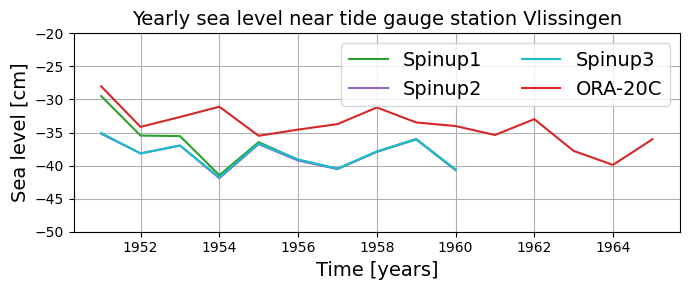

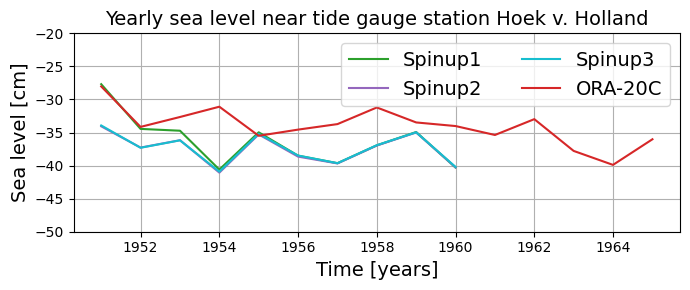

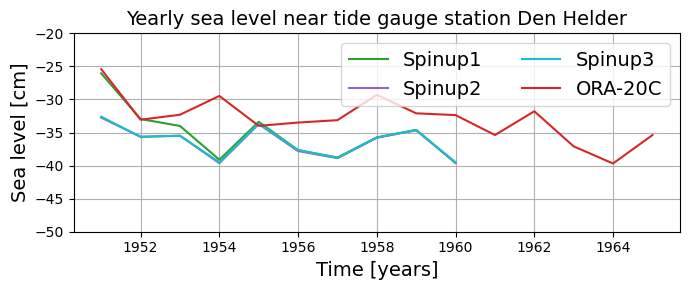

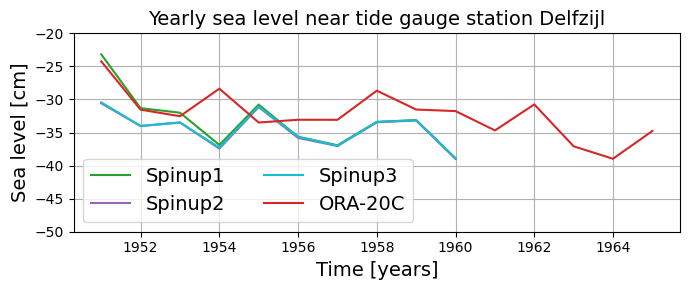

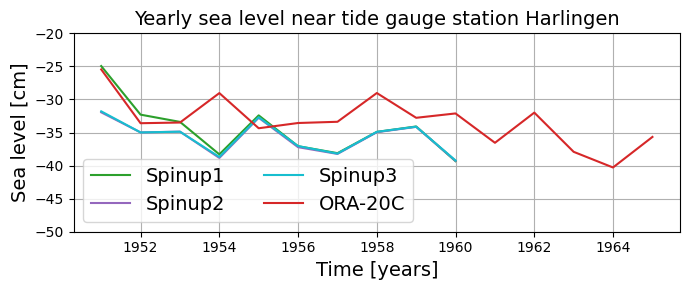

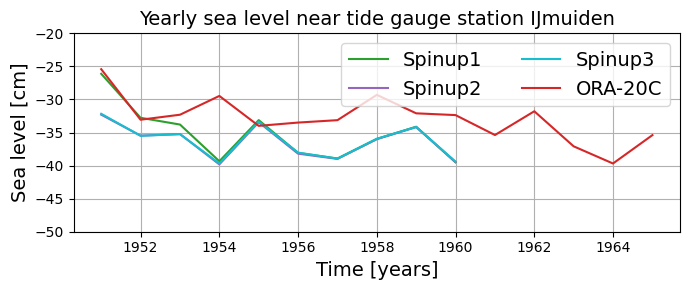

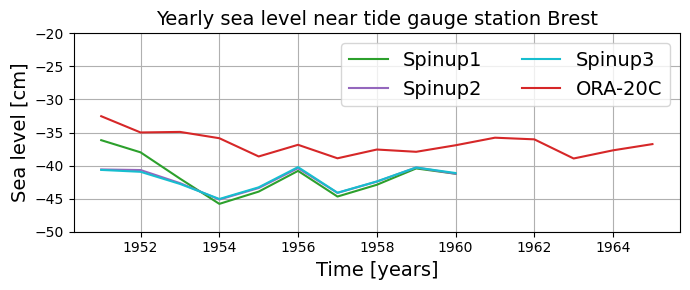

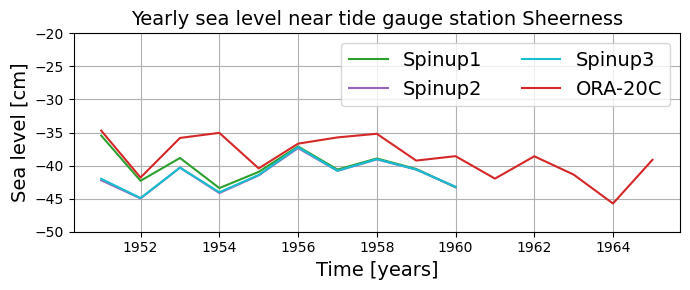

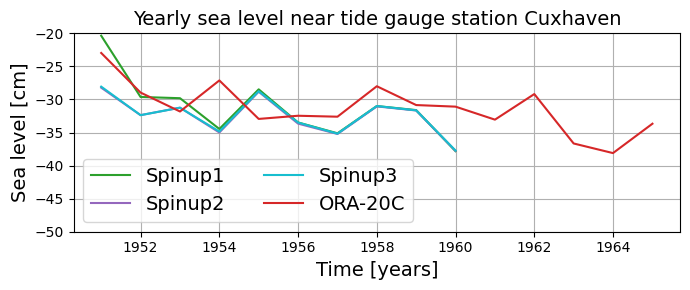

In [111]:
stations = ['Vlissingen', 'Hoek v. Holland', 'Den Helder', 'Delfzijl', 'Harlingen', 'IJmuiden', 'Brest', 'Sheerness', 'Cuxhaven']

for station in stations:

    plt.figure(figsize = (7,3))

    

    # Select data near station    
    run2_station = run2_year.sel(eta_rho = tg_roms_coords['eta_rho'][station], xi_rho = tg_roms_coords['xi_rho'][station])
    run3_station = run3_year.sel(eta_rho = tg_roms_coords['eta_rho'][station], xi_rho = tg_roms_coords['xi_rho'][station])
    spinup1_station = spinup1_year.sel(eta_rho = tg_roms_coords['eta_rho'][station], xi_rho = tg_roms_coords['xi_rho'][station])
    spinup2_station = spinup2_year.sel(eta_rho = tg_roms_coords['eta_rho'][station], xi_rho = tg_roms_coords['xi_rho'][station])
    spinup3_station = spinup3_year.sel(eta_rho = tg_roms_coords['eta_rho'][station], xi_rho = tg_roms_coords['xi_rho'][station])
    
    if station == 'Hoek v. Holland':
        
        ora_station = ora20_year.sel(latitude = tg_coords['lat'][station], longitude = tg_coords['lon'][station]-0.2, method = 'Nearest')
        
    
    elif station == 'Cuxhaven': 
        
        ora_station = ora20_year.sel(latitude = tg_coords['lat'][station]+0.5, longitude = tg_coords['lon'][station], method = 'Nearest')
        
    else:
         
        ora_station = ora20_year.sel(latitude = tg_coords['lat'][station], longitude = tg_coords['lon'][station], method = 'Nearest')

    
    # Make data shorter period
    run2_station = run2_station.where((run2_station.ocean_time.dt.year < 1965), drop = True)
    ora_station = ora_station.where((ora_station.time.dt.year < 1965), drop = True)

    # Plot data
    #plt.plot(run2_station.ocean_time, run2_station.zeta*100)
    #plt.plot(run3_station.ocean_time, run3_station.zeta*100)
    plt.plot(spinup1_station.ocean_time, spinup1_station.zeta*100, color = 'tab:green')
    plt.plot(spinup2_station.ocean_time, spinup2_station.zeta*100, color = 'tab:purple')
    plt.plot(spinup3_station.ocean_time, spinup3_station.zeta*100, color = 'tab:cyan')
    plt.plot(ora_station.time, ora_station.zos*100, color = 'tab:red')


    # Format figure
    fsize = 14

    plt.xlabel('Time [years]', fontsize = fsize)
    plt.ylabel('Sea level [cm]', fontsize = fsize)
    plt.title(f'Yearly sea level near tide gauge station {station}', fontsize = fsize)

    #plt.xlim([1950, 2020])
    #plt.xticks([1960, 1980, 2000, 2020], fontsize = fsize)
    #plt.yticks([-40, -20], fontsize = fsize)
    plt.ylim([-50, -20])
    plt.grid()


    # Add legend
    plt.legend(labels = ['Spinup1', 'Spinup2', 'Spinup3', 'ORA-20C'], fontsize = fsize, ncol=2)
    
    plt.tight_layout()
    
    
    if station == 'Hoek v. Holland':
        plt.savefig(f'{path_fig}spinups_roms_tidegauges_HoekvHolland')
    else:
        plt.savefig(f'{path_fig}spinups_roms_tidegauges_{station}')
    

## Compare regional mean sea level

In [112]:
plt.figure(figsize = (7,3))

weights = np.cos(np.deg2rad(run2_year.lat_rho[:,0]))

run2_weighted = run2_year.weighted(weights)
run3_weighted = run3_year.weighted(weights)
spinup1_weighted = spinup1_year.zeta.weighted(weights)
spinup2_weighted = spinup2_year.zeta.weighted(weights)
spinup3_weighted = spinup3_year.zeta.weighted(weights)

weights = np.cos(np.deg2rad(ora20_year.latitude))
ora_weighted = ora20_year.weighted(weights)

run2_area = run2_weighted.mean(['eta_rho', 'xi_rho'])
run3_area = run3_weighted.mean(['eta_rho', 'xi_rho'])
spinup1_area = spinup1_weighted.mean(['eta_rho', 'xi_rho'])
spinup2_area = spinup2_weighted.mean(['eta_rho', 'xi_rho'])
spinup3_area = spinup3_weighted.mean(['eta_rho', 'xi_rho'])
ora_area = ora_weighted.mean(['latitude', 'longitude'])


# Make data shorter period
run2_area = run2_area.where((run2_area.ocean_time.dt.year < 1965), drop = True)
ora_area = ora_area.where((ora_area.time.dt.year < 1965), drop = True)
   

# Plot data
plt.plot(run2_area.ocean_time, run2_area.zeta*100)
plt.plot(run3_area.ocean_time, run3_area.zeta*100)
#plt.plot(spinup1_area.ocean_time, spinup1_area*100)
#plt.plot(spinup2_area.ocean_time, spinup2_area*100)
#plt.plot(spinup3_area.ocean_time, spinup3_area*100)
plt.plot(ora_area.time, ora_area.zos*100, color = 'tab:red')




# Format figure
fsize = 14

plt.xlabel('Time [years]', fontsize = fsize)
plt.ylabel('Sea level [cm]', fontsize = fsize)
plt.title(f'Yearly sea level averaged over NWES area', fontsize = fsize)

plt.ylim([-51, -35])
#plt.xlim([1950, 2020])
#plt.xticks([1960, 1980, 2000, 2020], fontsize = fsize)
#plt.yticks([-50, -45, -40, -35], fontsize = fsize)

plt.grid()


# Add legend
plt.legend(labels = ['No spinup', 'Spinup', 'ORA-20C'], fontsize = fsize, ncol=3)

plt.tight_layout()

plt.savefig(f'{path_fig}yearly_area_mean_runs_ora')

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)

<Figure size 700x300 with 0 Axes>

In [ ]:
plt.figure(figsize = (7,3))

weights = np.cos(np.deg2rad(run2_year.lat_rho[:,0]))

run2_weighted = run2_year.weighted(weights)
run3_weighted = run3_year.weighted(weights)
spinup1_weighted = spinup1_year.zeta.weighted(weights)
spinup2_weighted = spinup2_year.zeta.weighted(weights)
spinup3_weighted = spinup3_year.zeta.weighted(weights)

weights = np.cos(np.deg2rad(ora20_year.latitude))
ora_weighted = ora20_year.weighted(weights)

run2_area = run2_weighted.mean(['eta_rho', 'xi_rho'])
run3_area = run3_weighted.mean(['eta_rho', 'xi_rho'])
spinup1_area = spinup1_weighted.mean(['eta_rho', 'xi_rho'])
spinup2_area = spinup2_weighted.mean(['eta_rho', 'xi_rho'])
spinup3_area = spinup3_weighted.mean(['eta_rho', 'xi_rho'])
ora_area = ora_weighted.mean(['latitude', 'longitude'])


# Make data shorter period
run2_area = run2_area.where((run2_area.ocean_time.dt.year < 1965), drop = True)
ora_area = ora_area.where((ora_area.time.dt.year < 1965), drop = True)
   

# Plot data
#plt.plot(run2_area.ocean_time, run2_area.zeta*100)
#plt.plot(run3_area.ocean_time, run3_area.zeta*100)
plt.plot(spinup1_area.ocean_time, spinup1_area*100, color = 'tab:green')
plt.plot(spinup2_area.ocean_time, spinup2_area*100, color = 'tab:purple')
plt.plot(spinup3_area.ocean_time, spinup3_area*100, color = 'tab:cyan')
plt.plot(ora_area.time, ora_area.zos*100, color = 'tab:red')




# Format figure
fsize = 14

plt.xlabel('Time [years]', fontsize = fsize)
plt.ylabel('Sea level [cm]', fontsize = fsize)
plt.title(f'Yearly sea level averaged over NWES area', fontsize = fsize)

plt.ylim([-51, -35])
#plt.xlim([1950, 2020])
#plt.xticks([1960, 1980, 2000, 2020], fontsize = fsize)
#plt.yticks([-50, -45, -40, -35], fontsize = fsize)

plt.grid()


# Add legend
plt.legend(labels = ['Spinup1', 'Spinup2', 'Spinup3', 'ORA-20C'], fontsize = fsize, ncol=2)

plt.tight_layout()

plt.savefig(f'{path_fig}yearly_area_mean_spinups_ora')

In [ ]:
plt.figure(figsize = (10,3))

weights = np.cos(np.deg2rad(run2_mon.lat_rho[:,0]))

run2_weighted = run2_mon.weighted(weights)
run3_weighted = run3_mon.weighted(weights)
spinup1_weighted = spinup1_mon.zeta.weighted(weights)
spinup2_weighted = spinup2_mon.zeta.weighted(weights)
spinup3_weighted = spinup3_mon.zeta.weighted(weights)

weights = np.cos(np.deg2rad(ora20_mon.latitude))
ora_weighted = ora20_mon.weighted(weights)

run2_area = run2_weighted.mean(['eta_rho', 'xi_rho'])
run3_area = run3_weighted.mean(['eta_rho', 'xi_rho'])
spinup1_area = spinup1_weighted.mean(['eta_rho', 'xi_rho'])
spinup2_area = spinup2_weighted.mean(['eta_rho', 'xi_rho'])
spinup3_area = spinup3_weighted.mean(['eta_rho', 'xi_rho'])
ora_area = ora_weighted.mean(['latitude', 'longitude'])



# Make data shorter period
run2_area = run2_area.where((run2_area.ocean_time.dt.year < 1964), drop = True)
ora_area = ora_area.where((ora_area.time.dt.year < 1964), drop = True)
  

# Plot data
plt.plot(run2_area.ocean_time, run2_area.zeta*100)
plt.plot(run3_area.ocean_time, run3_area.zeta*100, '--')
#plt.plot(spinup1_area.ocean_time, spinup1_area*100)
#plt.plot(spinup2_area.ocean_time, spinup2_area*100)
#plt.plot(spinup3_area.ocean_time, spinup3_area*100)
plt.plot(ora_area.time, ora_area.zos*100, color = 'tab:red')




# Format figure
fsize = 14

plt.xlabel('Time [years]', fontsize = fsize)
plt.ylabel('Sea level [cm]', fontsize = fsize)
plt.title(f'Monthly sea level averaged over NWES area', fontsize = fsize)

plt.ylim([-60, -25])
#plt.xlim([1950, 2020])
#plt.xticks([1960, 1980, 2000, 2020], fontsize = fsize)
#plt.yticks([-50, -45, -40, -35], fontsize = fsize)

plt.grid()


# Add legend
#plt.legend(labels = ['Run2', 'Run3', 'Spinup1', 'Spinup2', 'Spinup3', 'ORA-20C'], fontsize = fsize, ncol=5)
plt.legend(labels = ['No spinup', 'Spinup', 'ORA-20C'], fontsize = fsize, ncol=5)

plt.tight_layout()

plt.savefig(f'{path_fig}monthly_runs')

In [ ]:
plt.figure(figsize = (10,3))

weights = np.cos(np.deg2rad(run2_mon.lat_rho[:,0]))

run2_weighted = run2_mon.weighted(weights)
run3_weighted = run3_mon.weighted(weights)
spinup1_weighted = spinup1_mon.zeta.weighted(weights)
spinup2_weighted = spinup2_mon.zeta.weighted(weights)
spinup3_weighted = spinup3_mon.zeta.weighted(weights)

weights = np.cos(np.deg2rad(ora20_mon.latitude))
ora_weighted = ora20_mon.weighted(weights)

run2_area = run2_weighted.mean(['eta_rho', 'xi_rho'])
run3_area = run3_weighted.mean(['eta_rho', 'xi_rho'])
spinup1_area = spinup1_weighted.mean(['eta_rho', 'xi_rho'])
spinup2_area = spinup2_weighted.mean(['eta_rho', 'xi_rho'])
spinup3_area = spinup3_weighted.mean(['eta_rho', 'xi_rho'])
ora_area = ora_weighted.mean(['latitude', 'longitude'])



# Make data shorter period
run2_area = run2_area.where((run2_area.ocean_time.dt.year < 1960), drop = True)
ora_area = ora_area.where((ora_area.time.dt.year < 1964), drop = True)
  

# Plot data
#plt.plot(run2_area.ocean_time, run2_area.zeta*100)
#plt.plot(run3_area.ocean_time, run3_area.zeta*100)
plt.plot(spinup1_area.ocean_time, spinup1_area*100, color = 'tab:green')
plt.plot(spinup2_area.ocean_time, spinup2_area*100, color = 'tab:purple')
plt.plot(spinup3_area.ocean_time, spinup3_area*100, '--', color = 'tab:cyan')
plt.plot(ora_area.time, ora_area.zos*100, color = 'tab:red')




# Format figure
fsize = 14

plt.xlabel('Time [years]', fontsize = fsize)
plt.ylabel('Sea level [cm]', fontsize = fsize)
plt.title(f'Monthly sea level averaged over NWES area', fontsize = fsize)

plt.ylim([-60, -25])
#plt.xlim([1950, 2020])
#plt.xticks([1960, 1980, 2000, 2020], fontsize = fsize)
#plt.yticks([-50, -45, -40, -35], fontsize = fsize)

plt.grid()


# Add legend
#plt.legend(labels = ['Run2', 'Run3', 'Spinup1', 'Spinup2', 'Spinup3', 'ORA-20C'], fontsize = fsize, ncol=5)
plt.legend(labels = ['Spinup1', 'Spinup2', 'Spinup3', 'ORA-20C'], fontsize = fsize, ncol=5)

plt.tight_layout()

plt.savefig(f'{path_fig}monthly_spinups')

## Check how sea level values align in beginning

In [ ]:
plt.figure(figsize = (15,3))

weights = np.cos(np.deg2rad(run2_mon.lat_rho[:,0]))

run2_weighted = run2.zeta.isel(ocean_time=range(14)).weighted(weights)
run3_weighted = run3.zeta.isel(ocean_time=range(14)).weighted(weights)
spinup1_weighted = spinup1.zeta.isel(ocean_time=range(14)).weighted(weights)
spinup2_weighted = spinup2.zeta.isel(ocean_time=range(14)).weighted(weights)
spinup3_weighted = spinup3.zeta.isel(ocean_time=range(14)).weighted(weights)

weights = np.cos(np.deg2rad(ora20c.latitude))
ora_weighted = ora20c.isel(time=range(3)).weighted(weights)

run2_area = run2_weighted.mean(['eta_rho', 'xi_rho'])
run3_area = run3_weighted.mean(['eta_rho', 'xi_rho'])
spinup1_area = spinup1_weighted.mean(['eta_rho', 'xi_rho'])
spinup2_area = spinup2_weighted.mean(['eta_rho', 'xi_rho'])
spinup3_area = spinup3_weighted.mean(['eta_rho', 'xi_rho'])
ora_area = ora_weighted.mean(['latitude', 'longitude'])



# Make data shorter period
run2_area = run2_area.where((run2_area.ocean_time.dt.year < 1951), drop = True)


# Plot data
#plt.plot(run2_area.ocean_time, run2_area*100)
#plt.plot(run3_area.ocean_time, run3_area*100)
plt.scatter(spinup1_area.ocean_time, spinup1_area*100, s=20, marker = 'x')
plt.scatter(spinup2_area.ocean_time, spinup2_area*100, s=20, marker = 'x')
plt.scatter(spinup3_area.ocean_time, spinup3_area*100, s=20, marker = 'x')
plt.scatter(ora_area.time, ora_area.zos*100, s=30)




# Format figure
fsize = 14

plt.xlabel('Time [years]', fontsize = fsize)
plt.ylabel('Sea level [cm]', fontsize = fsize)
plt.title(f'Monthly sea level averaged over NWES area', fontsize = fsize)

plt.ylim([-60, -25])
#plt.xlim([1950, 2020])
#plt.xticks([1960, 1980, 2000, 2020], fontsize = fsize)
#plt.yticks([-50, -45, -40, -35], fontsize = fsize)

plt.grid()


# Add legend
#plt.legend(labels = ['Run2', 'Run3', 'Spinup1', 'Spinup2', 'Spinup3', 'ORA-20C'], fontsize = fsize, ncol=5)
plt.legend(labels = ['Spinup1', 'Spinup2', 'Spinup3', 'ORA-20C'], fontsize = fsize, ncol=5)

In [ ]:
spinup1_his = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ROMS output/spinup1/NorthSea4_his.nc')
spinup2_his = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ROMS output/spinup2/NorthSea4_his.nc')
spinup3_his = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ROMS output/spinup3/NorthSea4_his.nc')
run2_his = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ROMS output/run2/NorthSea4_his.nc')
run3_his = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ROMS output/run3/NorthSea4_his.nc')
clim = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/lateral forcing/NorthSea4 ORA20C/NorthSea4_clim_ORA20C_1950116_to_20091216.nc')

In [ ]:
plt.figure(figsize = (10,3))

weights = np.cos(np.deg2rad(run2_mon.lat_rho[:,0]))

#run2_weighted = run2.zeta.isel(ocean_time=range(14)).weighted(weights)
#run3_weighted = run3.zeta.isel(ocean_time=range(14)).weighted(weights)
spinup1_weighted = spinup1_his.zeta.isel(ocean_time=range(14)).weighted(weights)
spinup2_weighted = spinup2_his.zeta.isel(ocean_time=range(14)).weighted(weights)
spinup3_weighted = spinup3_his.zeta.isel(ocean_time=range(14)).weighted(weights)

weights = np.cos(np.deg2rad(ora20c.latitude))
ora_weighted = ora20c.isel(time=range(3)).weighted(weights)

weights = np.cos(np.deg2rad(clim.lat_rho[:,0]))
clim_weighted = clim.zeta.isel(ocean_time=range(3)).weighted(weights)


#run2_area = run2_weighted.mean(['eta_rho', 'xi_rho'])
#run3_area = run3_weighted.mean(['eta_rho', 'xi_rho'])
spinup1_area = spinup1_weighted.mean(['eta_rho', 'xi_rho'])
spinup2_area = spinup2_weighted.mean(['eta_rho', 'xi_rho'])
spinup3_area = spinup3_weighted.mean(['eta_rho', 'xi_rho'])
ora_area = ora_weighted.mean(['latitude', 'longitude'])
clim_area = clim_weighted.mean(['eta_rho', 'xi_rho'])


# Plot data
#plt.plot(run2_area.ocean_time, run2_area*100)
#plt.plot(run3_area.ocean_time, run3_area*100)
plt.scatter(ora_area.time, ora_area.zos*100, s=30, color = 'tab:red')
plt.scatter(clim_area.ocean_time, clim_area*100, s=30, color = 'tab:gray')
plt.scatter(spinup1_area.ocean_time, spinup1_area*100, s=35, marker = 'x', color = 'tab:green')
plt.scatter(spinup2_area.ocean_time, spinup2_area*100, s=35, marker = 'x', color = 'tab:purple')
plt.scatter(spinup3_area.ocean_time, spinup3_area*100, s=35, marker = 'x', color = 'tab:cyan')



# Format figure
fsize = 14

plt.xlabel('Time [years]', fontsize = fsize)
plt.ylabel('Sea level [cm]', fontsize = fsize)
plt.title(f'Sea level averaged over NWES area at start runs', fontsize = fsize)

plt.ylim([-60, -5])
#plt.xlim([1950, 2020])
#plt.xticks([1960, 1980, 2000, 2020], fontsize = fsize)
#plt.yticks([-50, -45, -40, -35], fontsize = fsize)

plt.grid()


# Add legend
#plt.legend(labels = ['Run2', 'Run3', 'Spinup1', 'Spinup2', 'Spinup3', 'ORA-20C'], fontsize = fsize, ncol=5)
plt.legend(labels = ['ORA-20C', 'Lateral forcing', 'Spinup1', 'Spinup2', 'Spinup3'], fontsize = fsize-2, ncol=3)

plt.tight_layout()

plt.savefig(f'{path_fig}start_run_spinups')

In [ ]:
plt.figure(figsize = (10,3))

weights = np.cos(np.deg2rad(run2_his.lat_rho[:,0]))

run2_weighted = run2_his.zeta.isel(ocean_time=range(14)).weighted(weights)
run3_weighted = run3_his.zeta.isel(ocean_time=range(14)).weighted(weights)
#spinup1_weighted = spinup1_his.zeta.isel(ocean_time=range(14)).weighted(weights)
#spinup2_weighted = spinup2_his.zeta.isel(ocean_time=range(14)).weighted(weights)
#spinup3_weighted = spinup3_his.zeta.isel(ocean_time=range(14)).weighted(weights)

weights = np.cos(np.deg2rad(ora20c.latitude))
ora_weighted = ora20c.isel(time=range(3)).weighted(weights)

weights = np.cos(np.deg2rad(clim.lat_rho[:,0]))
clim_weighted = clim.zeta.isel(ocean_time=range(3)).weighted(weights)

run2_area = run2_weighted.mean(['eta_rho', 'xi_rho'])
run3_area = run3_weighted.mean(['eta_rho', 'xi_rho'])
#spinup1_area = spinup1_weighted.mean(['eta_rho', 'xi_rho'])
#spinup2_area = spinup2_weighted.mean(['eta_rho', 'xi_rho'])
#spinup3_area = spinup3_weighted.mean(['eta_rho', 'xi_rho'])
ora_area = ora_weighted.mean(['latitude', 'longitude'])
clim_area = clim_weighted.mean(['eta_rho', 'xi_rho'])




# Plot data
#plt.scatter(spinup1_area.ocean_time, spinup1_area*100, s=20, marker = 'x')
#plt.scatter(spinup2_area.ocean_time, spinup2_area*100, s=20, marker = 'x')
#plt.scatter(spinup3_area.ocean_time, spinup3_area*100, s=20, marker = 'x')
plt.scatter(ora_area.time, ora_area.zos*100, s=30, color = 'tab:red')
plt.scatter(clim_area.ocean_time, clim_area*100, s=30, color = 'tab:gray')
plt.scatter(run2_area.ocean_time, run2_area*100, s=35, marker = 'x', color = 'tab:blue')
plt.scatter(run3_area.ocean_time, run3_area*100, s=35, marker = 'x', color = 'tab:orange')




# Format figure
fsize = 14

plt.xlabel('Time [years]', fontsize = fsize)
plt.ylabel('Sea level [cm]', fontsize = fsize)
plt.title(f'Sea level averaged over NWES area at start runs', fontsize = fsize)

plt.ylim([-60, -5])
#plt.xlim([1950, 2020])
#plt.xticks([1960, 1980, 2000, 2020], fontsize = fsize)
#plt.yticks([-50, -45, -40, -35], fontsize = fsize)

plt.grid()


# Add legend
#plt.legend(labels = ['Run2', 'Run3', 'Spinup1', 'Spinup2', 'Spinup3', 'ORA-20C'], fontsize = fsize, ncol=5)
plt.legend(labels = ['ORA-20C', 'Lateral forcing', 'No spinup', 'Spinup'], fontsize = fsize-2, ncol=2)

plt.tight_layout()

plt.savefig(f'{path_fig}start_run_runs')

## Make plot of longer runs

In [ ]:
run2 = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ROMS output/run2/newer/NorthSea4_avg.nc')
run3 = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ROMS output/run3/NorthSea4_avg_annual.nc')
run4 = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ROMS output/run4/NorthSea4_avg_annual.nc')
ora20c = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ORA20C/forcing input/ora20c.nc')
clim = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/lateral forcing/NorthSea4 ORA20C/NorthSea4_clim_ORA20C_1950116_to_20091216.nc')
clim2 = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/lateral forcing/NorthSea4 ORA20C/NorthSea4_clim_ORA20C_1950116_to_20091216.nc')

In [ ]:
run2 = run2.zeta
run3 = run3.zeta
run4 = run4.zeta
ora20c = ora20c.zos
clim = clim.zeta

In [ ]:
# Sort coordinates in increasing order
ora20c = ora20c.sortby(['time', 'latitude', 'longitude'])

# Remove years before 1950
ora20c = ora20c.where(ora20c.time.dt.year > 1949, drop = True)

# Remove years after 1994
ora20c = ora20c.where(ora20c.time.dt.year < 2010, drop = True)

# Only use ROMS domain
ora20c = ora20c.where((ora20c.latitude > 36) & (ora20c.latitude < 62) & (ora20c.longitude > -20 ) & (ora20c.longitude < 10) , drop = True) # Select region


# Obtain monthly and yearly averages
ora20_mon = ora20c.resample(time='1M').mean()
ora20_year = ora20c.resample(time='1Y').mean()

In [ ]:
# Sort coordinates in increasing order
run2 = run2.sortby(['ocean_time'])
run3 = run3.sortby(['ocean_time'])
run4 = run4.sortby(['ocean_time'])

# Remove years before 1950
run2 = run2.where(run2.ocean_time.dt.year > 1949, drop = True)

# Remove incomplete years
run2 = run2.where(run2.ocean_time.dt.year < 1994, drop = True)
run3 = run3.where(run3.ocean_time.dt.year < 2008, drop = True)
run4 = run4.where(run4.ocean_time.dt.year < 1982, drop = True)

# Obtain monthly and yearly averages
run2_mon = run2.resample(ocean_time='1M').mean()
run2_year = run2.resample(ocean_time='1Y').mean()

run3_year = run3
run4_year = run4

In [ ]:
# Remove years after 1994
clim = clim.where(clim.ocean_time.dt.year < 2010, drop = True)

# Obtain monthly and yearly averages
clim_mon = clim.resample(ocean_time='1M').mean()


clim_year = clim.resample(ocean_time='1Y').mean()


In [ ]:
plt.figure(figsize = (10,3))

weights = np.cos(np.deg2rad(run2_year.lat_rho[:,0]))
run2_weighted = run2_year.weighted(weights)
run3_weighted = run3_year.weighted(weights)
run4_weighted = run4_year.weighted(weights)

weights = np.cos(np.deg2rad(ora20_year.latitude))
ora_weighted = ora20_year.weighted(weights)

weights = np.cos(np.deg2rad(clim2.lat_rho[:,0]))
clim_weighted = clim_year.weighted(weights)

run2_area = run2_weighted.mean(['eta_rho', 'xi_rho'])
run3_area = run3_weighted.mean(['eta_rho', 'xi_rho'])
run4_area = run4_weighted.mean(['eta_rho', 'xi_rho'])
ora_area = ora_weighted.mean(['latitude', 'longitude'])
clim_area = clim_weighted.mean(['eta_rho', 'xi_rho'])


# Plot data
plt.plot(run2_area.ocean_time, run2_area*100, color = 'tab:blue')
plt.plot(run3_area.ocean_time, run3_area*100, color = 'tab:orange')
plt.plot(run4_area.ocean_time, run4_area*100, color = 'tab:olive')
plt.plot(ora_area.time, ora_area*100, color = 'tab:red')
plt.plot(clim_area.ocean_time, clim_area*100, color = 'tab:gray')



# Format figure
fsize = 14

plt.xlabel('Time [years]', fontsize = fsize)
plt.ylabel('Sea level [cm]', fontsize = fsize)
plt.title(f'Yearly sea level averaged over NWES area', fontsize = fsize)


plt.ylim([-51, -34])
#plt.xlim([1950, 2020])
#plt.xticks([1960, 1980, 2000, 2020], fontsize = fsize)
#plt.yticks([-50, -45, -40, -35], fontsize = fsize)

plt.grid()


# Add legend
plt.legend(labels = ['No spinup', 'Spinup', 'Spinup Vol cons', 'ORA-20C', 'Lateral forcing'], fontsize = fsize-2, ncol=2)

plt.tight_layout()

plt.savefig(f'{path_fig}yearly_area_mean_runs_ora_longer')

In [ ]:
plt.figure(figsize = (10,3))

weights = np.cos(np.deg2rad(run2_year.lat_rho[:,0]))
run2_weighted = run2_year.weighted(weights)
run3_weighted = run3_year.weighted(weights)
run4_weighted = run4_year.weighted(weights)

weights = np.cos(np.deg2rad(ora20_year.latitude))
ora_weighted = ora20_year.weighted(weights)

weights = np.cos(np.deg2rad(clim2.lat_rho[:,0]))
clim_weighted = clim_year.weighted(weights)

run2_area = run2_weighted.mean(['eta_rho', 'xi_rho'])
run3_area = run3_weighted.mean(['eta_rho', 'xi_rho'])
run4_area = run4_weighted.mean(['eta_rho', 'xi_rho'])
ora_area = ora_weighted.mean(['latitude', 'longitude'])
clim_area = clim_weighted.mean(['eta_rho', 'xi_rho'])


run2_area = run2_area - run2_area.isel(ocean_time=0)
run3_area = run3_area - run3_area.isel(ocean_time=0)
run4_area = run4_area - run4_area.isel(ocean_time=0)
ora_area = ora_area - ora_area.isel(time=0)
clim_area = clim_area - clim_area.isel(ocean_time=0)


# Plot data
plt.plot(run2_area.ocean_time, run2_area*100, color = 'tab:blue')
plt.plot(run3_area.ocean_time, run3_area*100, color = 'tab:orange')
plt.plot(run4_area.ocean_time, run4_area*100, color = 'tab:olive')
plt.plot(ora_area.time, ora_area*100, color = 'tab:red')
plt.plot(clim_area.ocean_time, clim_area*100, color = 'tab:gray')



# Format figure
fsize = 14

plt.xlabel('Time [years]', fontsize = fsize)
plt.ylabel('Sea level [cm]', fontsize = fsize)
plt.title(f'Yearly sea level averaged over NWES area \n Initial value is substracted', fontsize = fsize)


#plt.ylim([-51, -34])
#plt.xlim([1950, 2020])
#plt.xticks([1960, 1980, 2000, 2020], fontsize = fsize)
#plt.yticks([-50, -45, -40, -35], fontsize = fsize)

plt.grid()


# Add legend
plt.legend(labels = ['No spinup', 'Spinup', 'Spinup Vol cons', 'ORA-20C', 'Lateral forcing'], fontsize = fsize-2, ncol=2)

plt.tight_layout()

plt.savefig(f'{path_fig}yearly_area_mean_runs_ora_longer_anom')